#### Project description

We have to analyze data from the entertainment application Procrastinate Pro+ about users attracted from May 1 to October 27, 2019:
  - server log with data about their visits,
  - unloading purchases for this period,
  - advertising expenses.
_______

Questions to answer:
- where users come from and what devices they use,
- how much does it cost to attract users from various advertising channels;
- how much money each client brings,
- when the cost of attracting a client pays off,
- what factors interfere with attracting customers.
_______
Data sources

We have three datasets at our disposal.
- The file visits_info_short.csv stores the server log with information about site visits,
- orders_info_short.csv — information about orders,
- and costs_info_short.csv — information about advertising costs.
_______
Plan of the study:
 
  1 Check data for anomalies and errors
 
  2 Clear data in case of duplicates, empty lines
 
  3 Create a portrait of users, study their orders
 
  4 Calculate user costs
 
  5 Calculate the company’s costs for attracting customers
 
  6 Analyze the factors influencing the trend in expenses of both parties
 
  7 Conclusions

### Data Survey

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import math
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt

In [72]:
# load df with visitstry
try:
    visits = pd.read_csv('./visits_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')

In [73]:
# load df with orders
try:
    orders = pd.read_csv('./orders_info_short.csv')
except:
    orders = pd.read_csv('/datasets/orders_info_short.csv')

In [74]:
# load df with costs
try:
    costs = pd.read_csv('./costs_info_short.csv')
except:
    costs = pd.read_csv('/datasets/costs_info_short.csv')

#### Visits

In [75]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [76]:
visits.shape # number of rows and columns

(309901, 6)

In [77]:
visits.duplicated() # number of duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
309896    False
309897    False
309898    False
309899    False
309900    False
Length: 309901, dtype: bool

In [78]:
visits.isna().sum() # number of na

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [79]:
visits.info() #data types + number of values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [80]:
visits['Region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [81]:
visits['Channel'].unique()#unique values in the column

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [82]:
visits['Device'].unique() # unique values in the column

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [83]:
visits['User Id'].nunique() #  number of unique values in the column

150008

In [84]:
visits.columns =visits.columns.str.lower().str.replace(' ','_') #change the column names to lowercase

In [85]:
# convert columns to date type
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

#### Orders

In [86]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [87]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [88]:
orders['Revenue'].describe() # data description

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: Revenue, dtype: float64

In [89]:
orders.isna().sum()  # number of na

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [90]:
orders.duplicated().sum()# number of duplicates

0

In [91]:
orders.columns = orders.columns.str.lower().str.replace(' ','_') # change the column names to lowercase

In [92]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
# convert columns to date type

#### Costs

In [93]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [94]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [95]:
costs.duplicated().sum() # number of duplicates 

0

In [96]:
costs['dt'] = pd.to_datetime(costs['dt'])# convert columns to date type

costs.columns = costs.columns.str.lower() # change the column names to lowercase

Based on the data, we will study 150,008 users of devices such as iPhone, Mac, Android, PC from the USA, the World Bank, France and Germany, who made 40,212 orders from May 1 to October 27, 2019

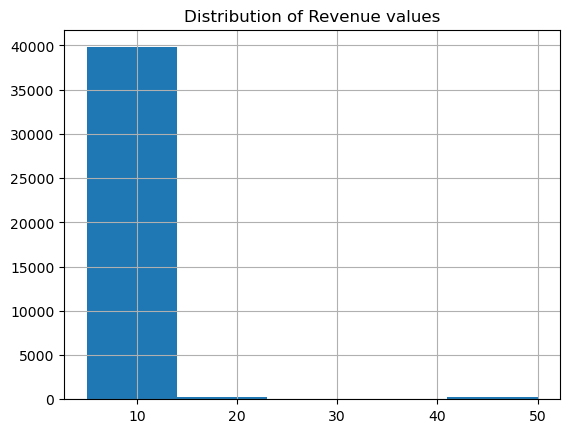

In [97]:
orders['revenue'].hist(bins = 5) 
plt.title("Distribution of Revenue values");


In [98]:
orders.query('revenue > 30').sort_values('revenue').tail(10) # which orders bring profit in the region of 50

,user_id,event_dt,revenue
11596,519135940288,2019-08-09 01:32:36,49.99
12142,152214276804,2019-08-12 13:02:56,49.99
12254,166813253726,2019-08-13 21:43:38,49.99
12317,398911918921,2019-08-13 03:39:36,49.99
12426,367328607559,2019-08-14 14:12:04,49.99
12597,444817846316,2019-08-15 04:06:24,49.99
12689,994505199749,2019-08-16 09:57:01,49.99
12824,441896408811,2019-08-16 04:14:30,49.99
13656,928971293632,2019-08-21 10:23:41,49.99
39550,968421663220,2019-10-25 05:00:33,49.99


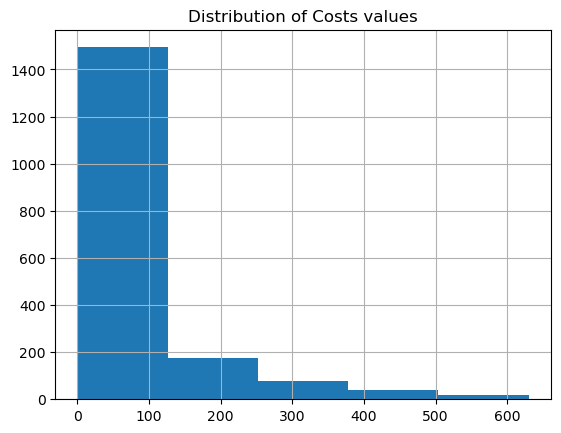

In [99]:
costs['costs'].hist(bins = 5)
plt.title("Distribution of Costs values");


There are no negative values for profits or expenses.

### Set functions for calculating and analyzing LTV, ROI, retention and conversion.

In [100]:
# function for creating user profiles
def get_profiles(sessions, orders, ad_costs):

# find the parameters of the first visits  
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # for cohort analysis, we determine the date of the first visit and the first day of the month in which this visit occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

# add a sign of paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # count the number of unique users with the same source and date of attraction
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

# we combine spending on advertising and the number of attracted users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # divide advertising costs by the number of attracted users save the results in the acquisition_cost (CAC) column
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

# add acquisition cost to profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

# the cost of acquiring organic users is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [101]:
# retention

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # add payer column to  dimensions list
    dimensions = ['payer'] + dimensions

    # exclude customers with dates before last_suitable_acquisition_dat
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # join raw data for retention calculation
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # creating table
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # creating table with retemtion dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

In [102]:
# conversion

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude customers with dates before last_suitable_acquisition_dat
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # get the date of the 1st purchase of each customer
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # join raw data for calculation
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        
        
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get the table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions: 
        dimensions = []

    # get the table of conversion dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )


    return result_raw, result_grouped, result_in_time 

In [103]:
# LTV & ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

# exclude users who have not “lived” to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    #add data about purchases in profiles 
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # calculate the lifetime of users fro each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # group by cohort, if dimensions is empty
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # create table 
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # find the amount of revenue with accumulation
        result = result.fillna(0).cumsum(axis=1)

        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
    # combine cohort sizes and revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
    # calculate LTV: divide each “cell” in a row by the size of the cohort
        result = result.div(result['cohort_size'], axis=0)
    # exclude all lifetimes exceeding the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restore cohort sizes
        result['cohort_size'] = cohort_sizes

        # collect a dataframe with user data and CAC values,
         # adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

       # calculate the average CAC based on parameters from dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # calculate ROI: divide LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # removing lines with endless ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        
        roi['cohort_size'] = cohort_sizes

        # adding CAC to the ROI table
        roi['cac'] = cac['cac']

        # in the final table we leave the cohort sizes, CAC
         # and ROI in life times not exceeding the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # LTV and ROI tables
        return result, roi

   
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for dynamics tables remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # we get tables of LTV and ROI dynamics
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw, 
        result_grouped,  
        result_in_time, 
        roi_grouped,  
        roi_in_time,  
    ) 

As well as functions for visualizing these metrics - filter_data(), plot_retention(), plot_conversion() and plot_ltv_roi().

In [104]:
# function for frame smoothing

def filter_data(df, window):
    # apply a moving average for each column
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [105]:
# function to visualize retention
def plot_retention(retention, retention_history, horizon, window=7):

    
    plt.figure(figsize=(15, 10))

    # exclude cohort sizes and first day retention
    retention = retention.drop(columns=['cohort_size', 0])
    # in the dynamics table we leave only the required lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if only payer is in the retention table indexes,
     # add a second sign - cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # in the graph table - two columns and two rows, four cells
     # in the first we build retention for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of paying users')

# in the second cell we build retention curves for non-payers
     # vertical axis is from the graph from the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of unpaying users')

# in the third cell - dynamics of retention of paying people
    ax3 = plt.subplot(2, 2, 3)
    # get the column names for the pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filter the data and build a graph
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of attraction')
    plt.title(
        'Dynamics of retention of paying users on the {}th day'.format(
            horizon
        )
    )

    # in the fourth cell - the dynamics of retention of non-payers
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # filter the data and build a graph
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Date of attraction')
    plt.title(
        'Dynamics of retention of unpaying users on the {}th day'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [106]:
# function to visualize conversion

def plot_conversion(conversion, conversion_history, horizon, window=7):

    
    plt.figure(figsize=(15, 5))

    # exclude cohort sizes and first day conversion
    conversion = conversion.drop(columns=['cohort_size'])
    # in the dynamics table we leave only the required lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Conversion')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of attraction')
    plt.title('Dynamics of conversion of unpaying users on the {}th day'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [107]:
# functions for LTV & ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    
    plt.figure(figsize=(20, 10))

    # exclude cohort sizes from  ltv table
    ltv = ltv.drop(columns=['cohort_size'])
    # in the dynamics table we leave only the required lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # create new df
    cac_history = roi_history[['cac']]

    # from roi table exclude cohort sizes and cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    #  ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # ltv dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)

    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of attraction')
    plt.title('User LTV dynamics on {} day'.format(horizon))

    # cac dynamics
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)

    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of attraction')
    plt.title('Dynamics of user acquisition cost')

    # roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    #  roi dynamics
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)

    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.xlabel('Date of attraction')
    plt.title('User ROI dynamics on {} day'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Exploratory data analysis

In [108]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [109]:
print('Min date' + ' ' + str(profiles['dt'].min()))
print('Max date' + ' ' + str(profiles['dt'].max()))

Min date 2019-05-01 00:00:00
Max date 2019-10-27 00:00:00


The dates correspond to the stated period for attracting users

Let's find out from which countries users come to the application and which country accounts for the most paying users.
Let's build a table showing the number of users and the share of paying people from each country.

In [110]:
payers_by_country = profiles\
                    .pivot_table(index = 'region', values = 'user_id', columns = 'payer', aggfunc = 'nunique')\
                    .rename(columns = {False:"not_payers",True:"payers"})\
                    .reset_index()\
                    .sort_values('payers')

In [111]:
payers_by_country['ratio'] = round(((payers_by_country['payers']/(payers_by_country['not_payers']+payers_by_country['payers']))*100),2)

In [112]:
payers_by_country

payer,region,not_payers,payers,ratio
1,Germany,14365,616,4.11
0,France,16787,663,3.80
2,UK,16875,700,3.98
3,United States,93100,6902,6.90


The majority of users are from the US, and the US also has a large share of paying users.

We find out what devices customers use and what devices are preferred by paying users.

In [113]:
devices = profiles\
                    .pivot_table(index = 'device', values = 'user_id', columns = 'payer', aggfunc = 'nunique')\
                    .rename(columns = {False:"not_payers",True:"payers"})\
                    .reset_index()\
                    .sort_values('payers')

In [114]:
devices['ratio'] = round(((devices['payers']/(devices['not_payers']+ devices['payers']))*100),2)

In [115]:
devices

payer,device,not_payers,payers,ratio
2,PC,28918,1537,5.05
1,Mac,28130,1912,6.36
0,Android,32982,2050,5.85
3,iPhone,51097,3382,6.21


The iPhone leads in terms of the number of users, but the share of paying users is higher for MAC users. Overall, there are more apple device lovers, and their willingness to pay is higher.

Let's study advertising sources of attraction and determine the channels from which the most paying users came. Build a table showing the number of users and the share of paying for each acquisition channel.

In [116]:
channels = profiles\
                    .pivot_table(index = 'channel', values = 'user_id', columns = 'payer', aggfunc = 'nunique')\
                    .rename(columns = {False:"not_payers",True:"payers"})\
                    .reset_index()\
                    .sort_values('payers')

In [117]:
channels['ratio'] = round(((channels['payers']/(channels['not_payers']+ channels['payers']))*100),2)

In [118]:
channels

payer,channel,not_payers,payers,ratio
3,MediaTornado,4208,156,3.57
8,YRabbit,4147,165,3.83
9,lambdaMediaAds,1924,225,10.47
4,OppleCreativeMedia,8372,233,2.71
2,LeapBob,8291,262,3.06
5,RocketSuperAds,4096,352,7.91
0,AdNonSense,3440,440,11.34
7,WahooNetBanner,8100,453,5.30
10,organic,55279,1160,2.06
6,TipTop,17683,1878,9.60


TOP 3 advertising channels FaceBoom, AdNonSense, lambdaMediaAds

Created functions for calculation:

  LTV shows the profit from the relationship with the client for the entire period.
  ROI - shows by what percentage LTV exceeded CAC (Customer Acquisition Cost, cost of attracting one customer).

Retention Rate - shows the customer’s lifespan in the company

CR is the proportion of cohort users who completed an action (for example, paying for a purchase).

### Buyer profile

User from the US, UK, France or Germany. Share of users, including those who pay more in the USA
iPhone, Android, Mac or PC users who made a total of 40,212 orders from May 1 to October 27, 2019.


The business plan stipulates that users should pay for themselves no later than two weeks after attracting. Thus, the analysis horizon is 14 days.

The minimum date for attracting users is May 1, 2019.
The maximum date taking into account the horizon is October 13, 2019.

___________

A total of 10 advertising sources of attraction were used. Among which we can highlight the TOP-3
- FaceBoom - 12%
- AdNonSense - 11%
- lambdaMediaAds - 10% each

##### Marketing

Let's calculate the total amount of marketing expenses.

In [119]:
costs['costs'].sum().round()

105497.0

How expenses are distributed among advertising sources, that is, how much money was spent on each source.

In [120]:
profiles.groupby('channel').agg({'acquisition_cost': 'sum'})\
        .sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Note that TipTop spends the most, but this channel is not included in the TOP 3 channels that attracted paying users, and lambdaMediaAds, one of the TOP 3, spent the least amount of expenses.

In [121]:
costs['month'] = costs['dt'].dt.month # create new column

In [122]:
costs['week'] = costs['dt'].dt.week

C:\Users\ARunaeva\AppData\Local\Temp\ipykernel_13992\2363937111.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  costs['week'] = costs['dt'].dt.week


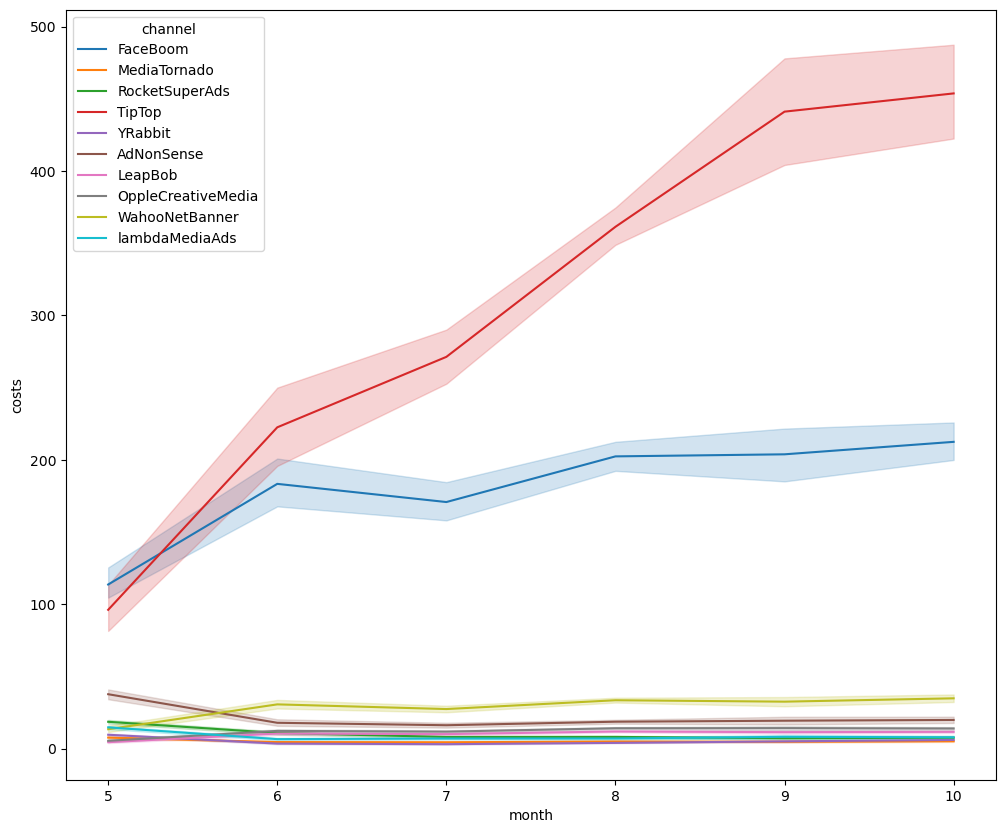

In [123]:
line,ax = plt.subplots(figsize=(12,10))
sns.lineplot(x="month", y="costs",
             hue="channel", 
             data=costs);
#dynamics of changes in expenses over time, months

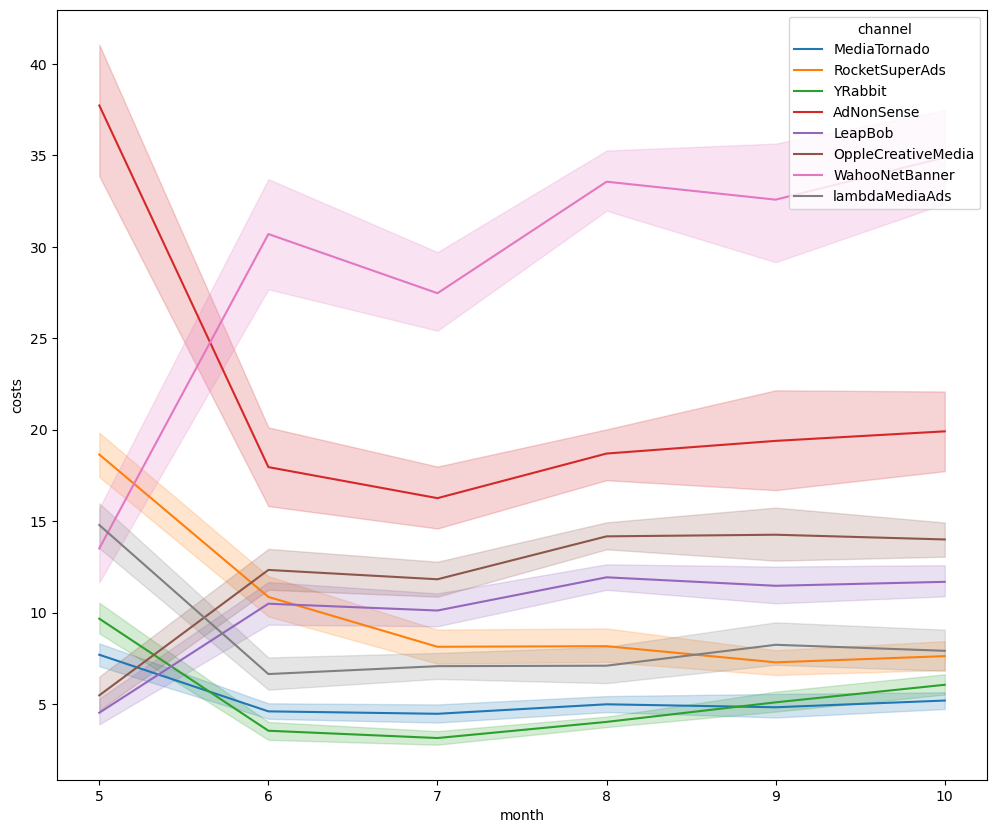

In [124]:
line,ax = plt.subplots(figsize=(12,10))
sns.lineplot(x="month", y="costs",
             hue="channel", 
             data=costs.query('channel != ["TipTop", "FaceBoom"]'));
#dynamics of changes in expenses over time, months without leading channels

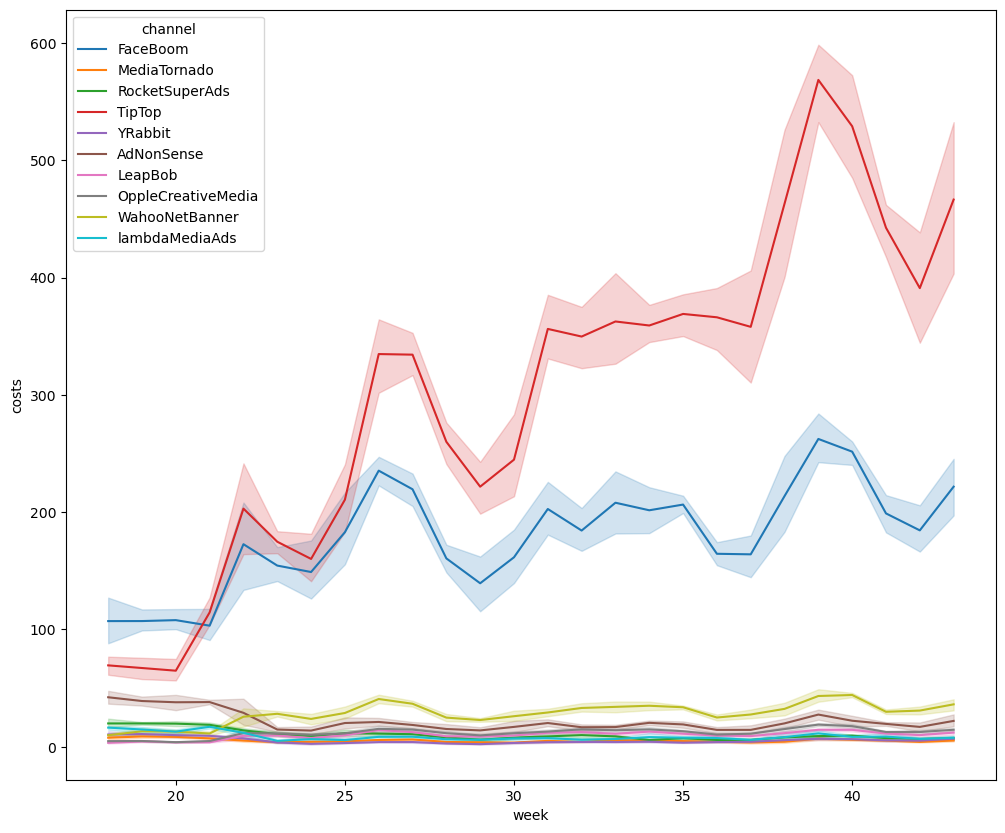

In [125]:
line,ax = plt.subplots(figsize=(12,10))
sns.lineplot(x="week", y="costs",
             hue="channel", 
             data=costs);
#dynamics of changes in expenses by week

Spending on TipTop and FaceBoom was higher than the rest from the very beginning and began to increase sharply after the 20th week of the year

Let's find out how much it cost on average to attract one user (CAC) from each source. We will use user profiles.

In [126]:
cac = profiles.groupby('channel')\
              .agg({'acquisition_cost': 'mean'})\
              .sort_values(by='acquisition_cost', ascending=False)\
              .reset_index().round(2)
cac

,channel,acquisition_cost
0,TipTop,2.80
1,FaceBoom,1.11
2,AdNonSense,1.01
3,lambdaMediaAds,0.72
4,WahooNetBanner,0.60
5,RocketSuperAds,0.41
6,OppleCreativeMedia,0.25
7,YRabbit,0.22
8,MediaTornado,0.22
9,LeapBob,0.21


The highest average cost of acquisition is for the channel with the highest advertising costs, however, all the channels in the TOP 3 are followed by FaceBoom, AdNonSense, lambdaMediaAds.

In [127]:
# average CAC for the project without organic users
profiles.query('channel != "organic"').agg({'acquisition_cost': 'mean'}).round(2)

acquisition_cost    1.13
dtype: float64

The total cost of the project was 105,497. The largest costs were for

     TipTop 54751.30
     FaceBoom 32445.60
     WahooNetBanner 5151.00 There is a noticeable big gap in terms of the sum of the first two, even from 3rd place; the costs for the remaining 7 channels are even lower. There is a noticeable increase in acquisition costs from May to September, especially for FaceBoom and TipTop.

Attracting one user from the TipTop channel cost the company an average of 2.8 units, from FaceBoom - 1.11 units, from AdNonSense - 1.01 units, with an average of 1.13 units for the project. It turns out that only TipTop has a higher CAC than the average for the project.

#### Advertising payback

In [128]:
profiles = profiles.query('channel != "organic"') #exclude organic users
observation_date = datetime(2019, 11, 1).date()  # moment of analysis
horizon_days = 14  #analysis horizon

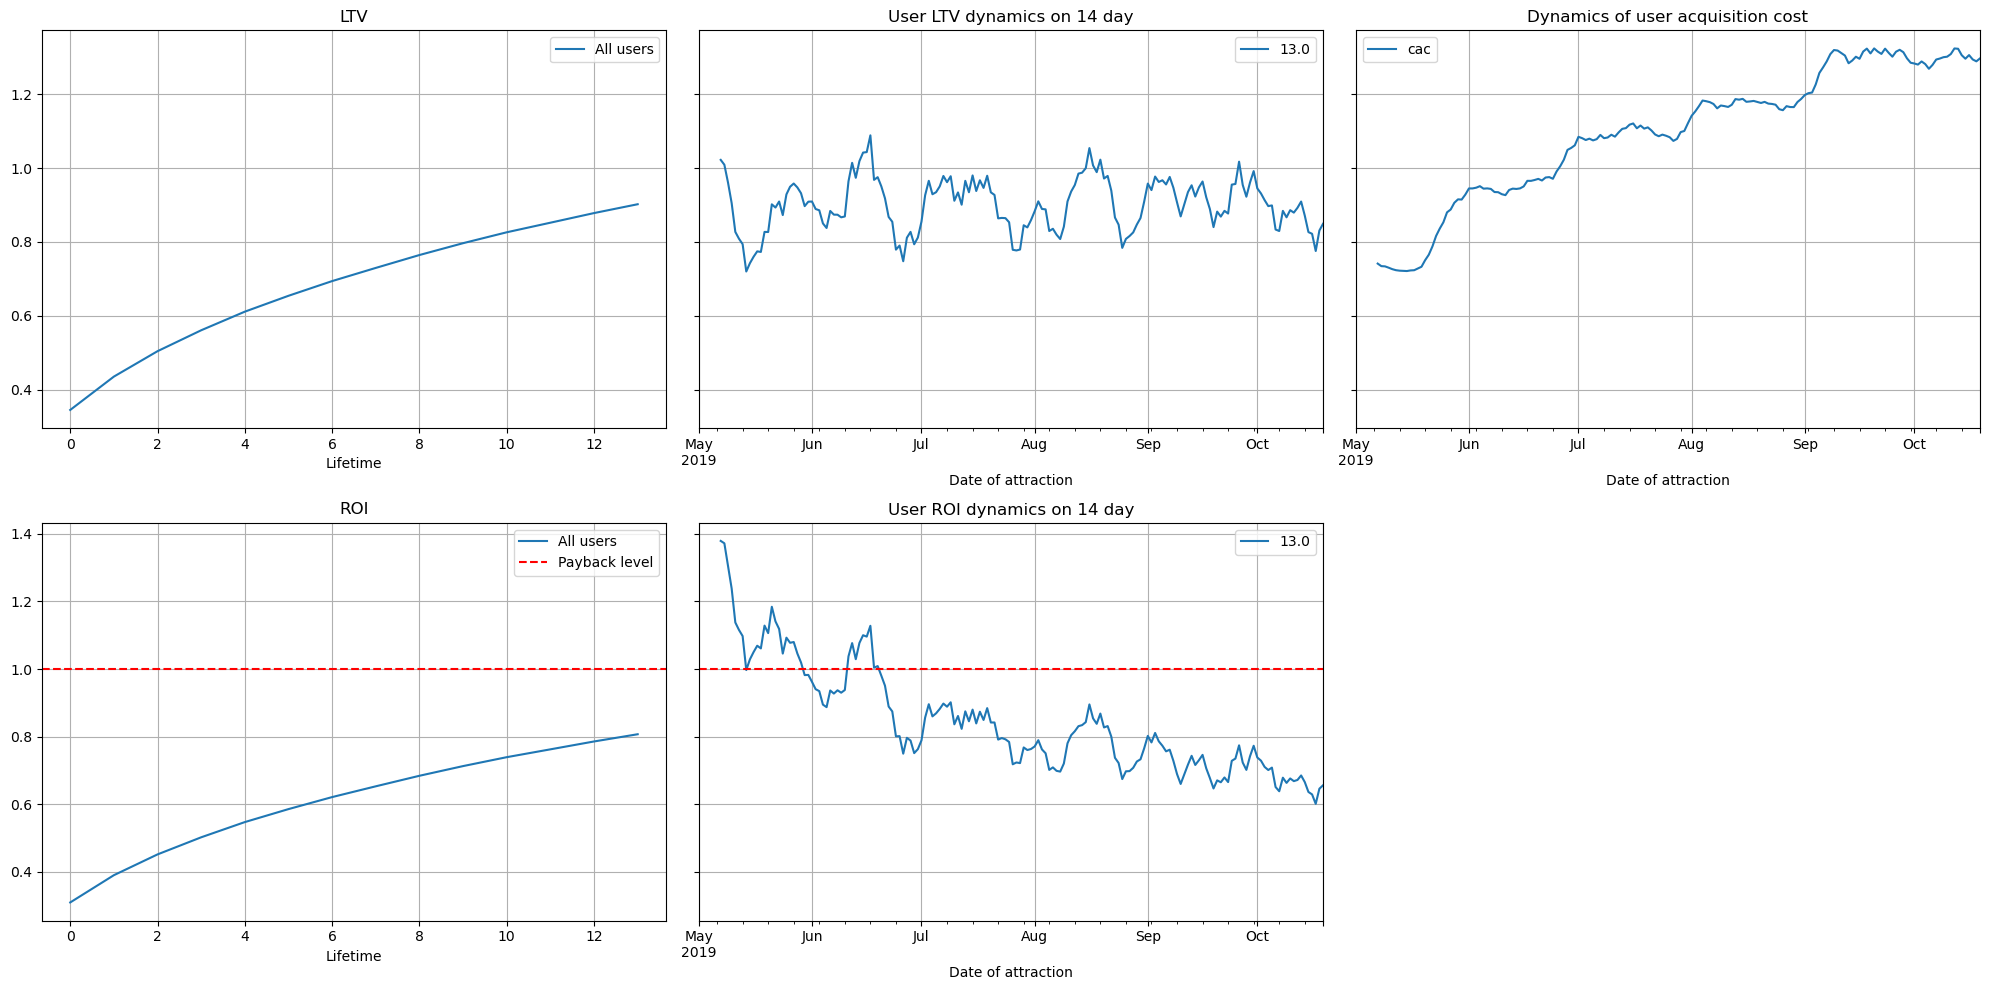

In [129]:
# LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# diagrams
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- LTV is going up, which means the profit from each client increases throughout the entire life time.
- The dynamics of the cost of attraction and the dynamics of retention are growing, but the level of payback has not been passed, much less exceeded. The dynamics of user ROI on the 14th day becomes lower than the payback level since mid-June.

Let's check user conversion and the dynamics of its change. We will do the same with user retention. Let's build conversion and retention charts.

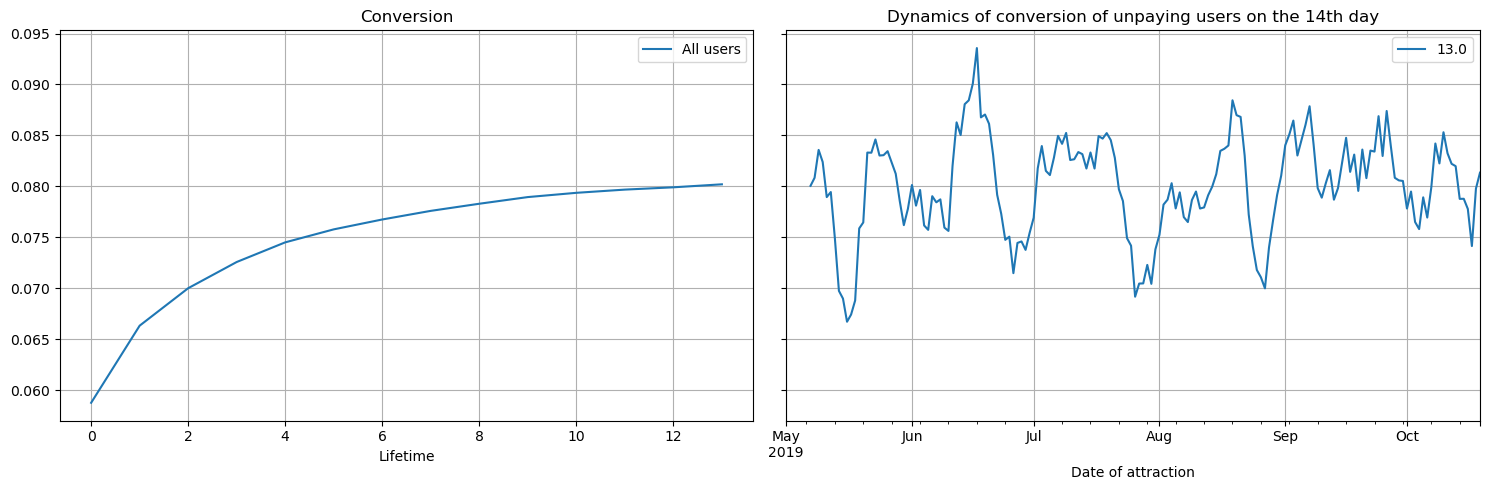

In [130]:
#conversion
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Users actively convert in the first 4 days of lifetime; after that, the conversion grows, but not at such a fast pace.

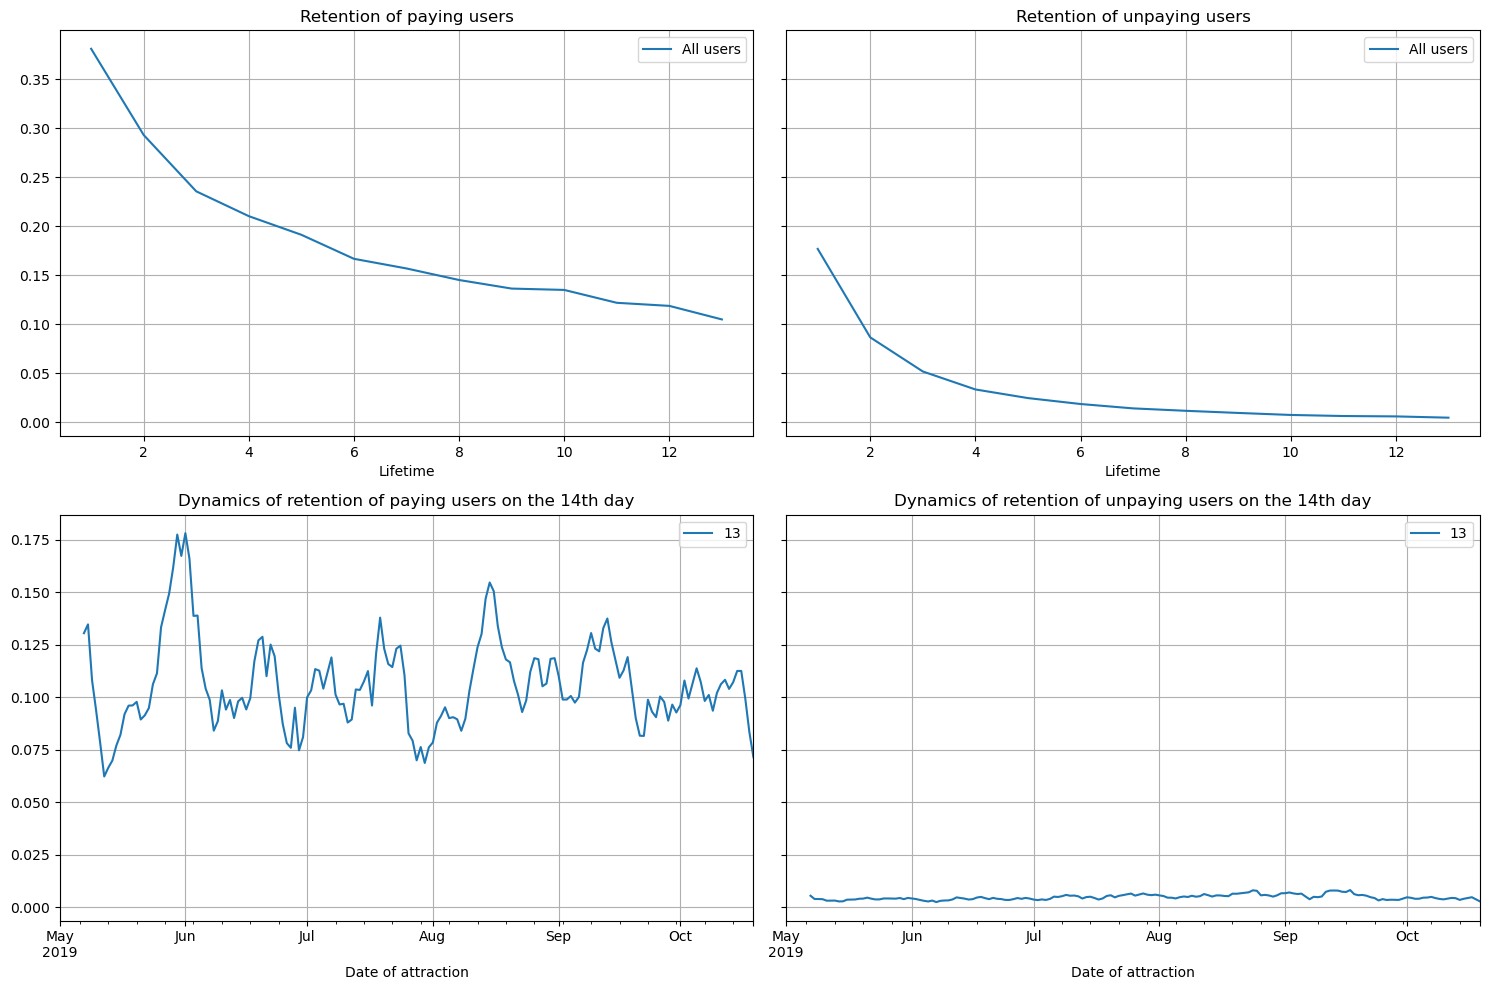

In [131]:
#retention
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

The maximum retention on the 14th day in the amount of 17.5% was observed in June.
Non-paying users almost never stay beyond the 2nd day.

#### Analyze your advertising ROI by device. Build graphs of LTV and ROI, as well as graphs of the dynamics of LTV, CAC and ROI.

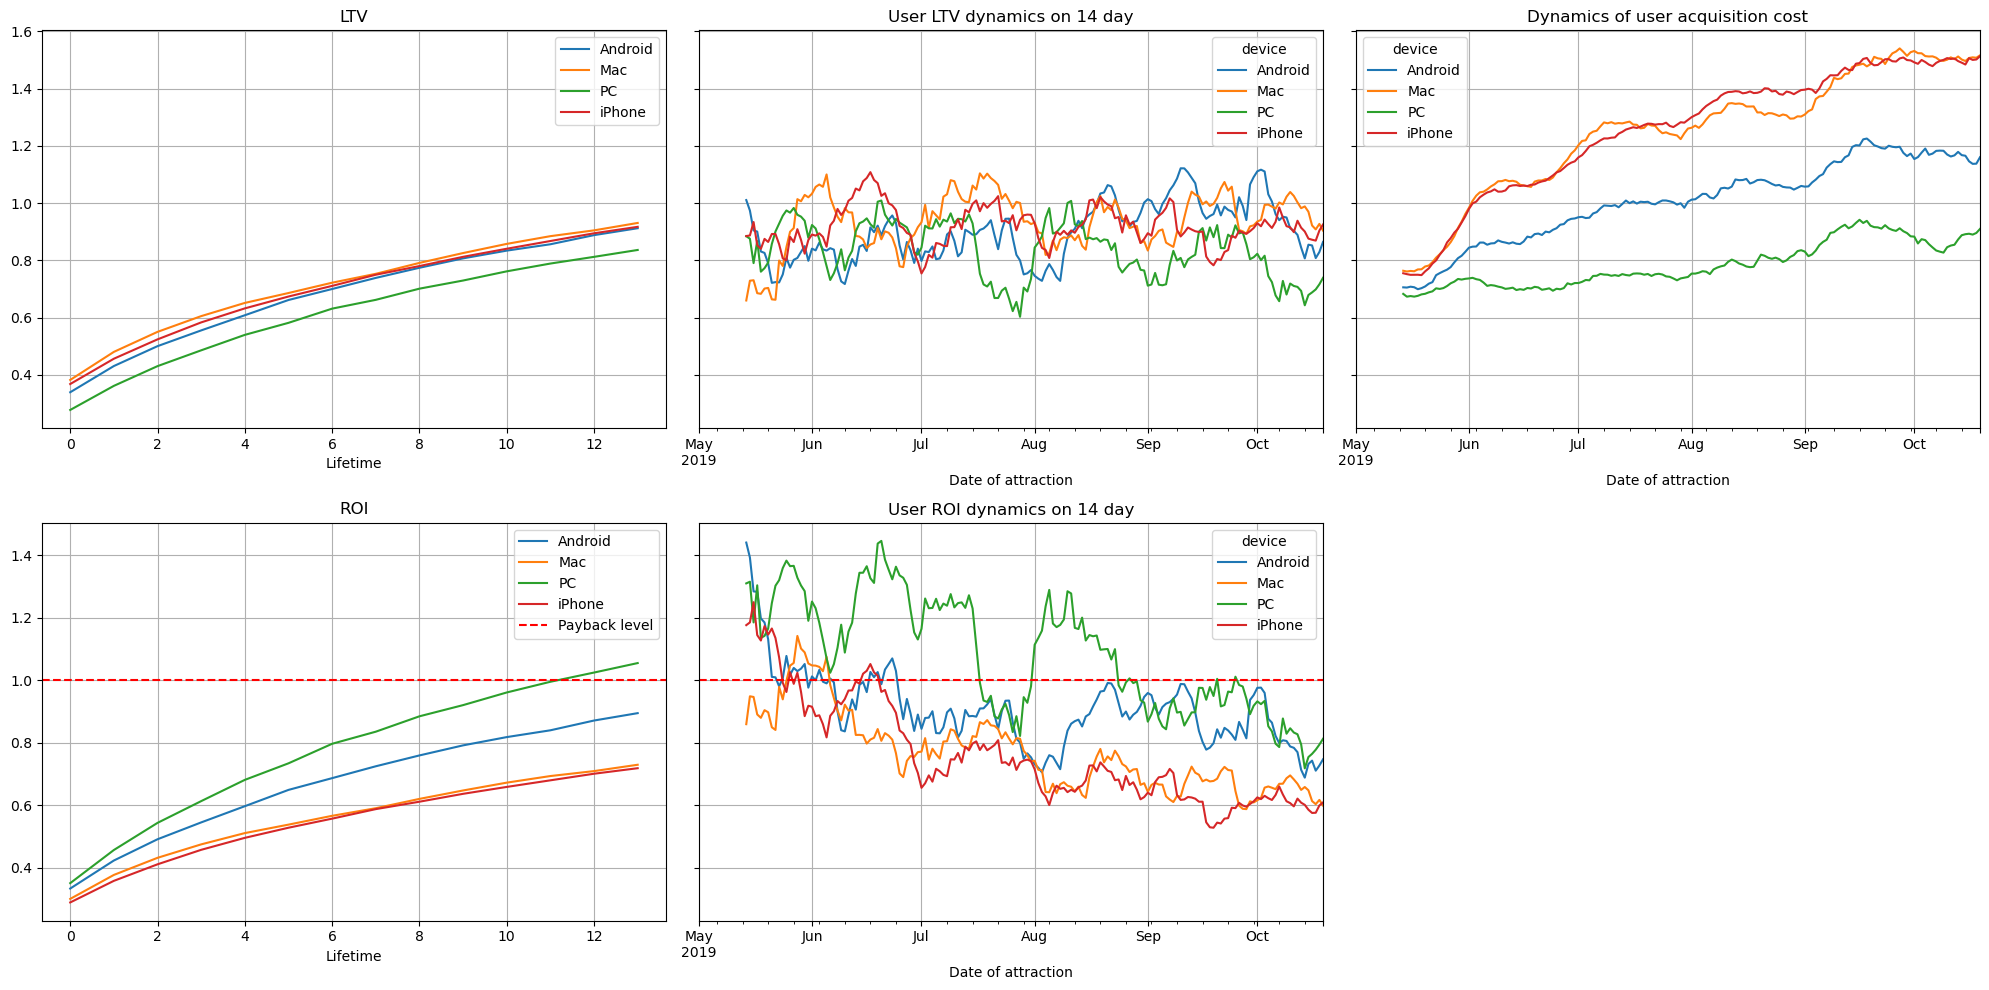

In [132]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

LTV of users is growing steadily for all devices.
Apple users, as we have already found out, pay better, and they pay better throughout their “lifetime”, as the LTV of PC holders is lower. The cost of acquiring Apple users is higher initially and has increased more over time.
The dynamics of ROI show that in May-June almost all users paid off, and after that the ROI level became lower than the payback level. The PC indicator lasted the longest above the level. IPhone ROI fell the fastest.

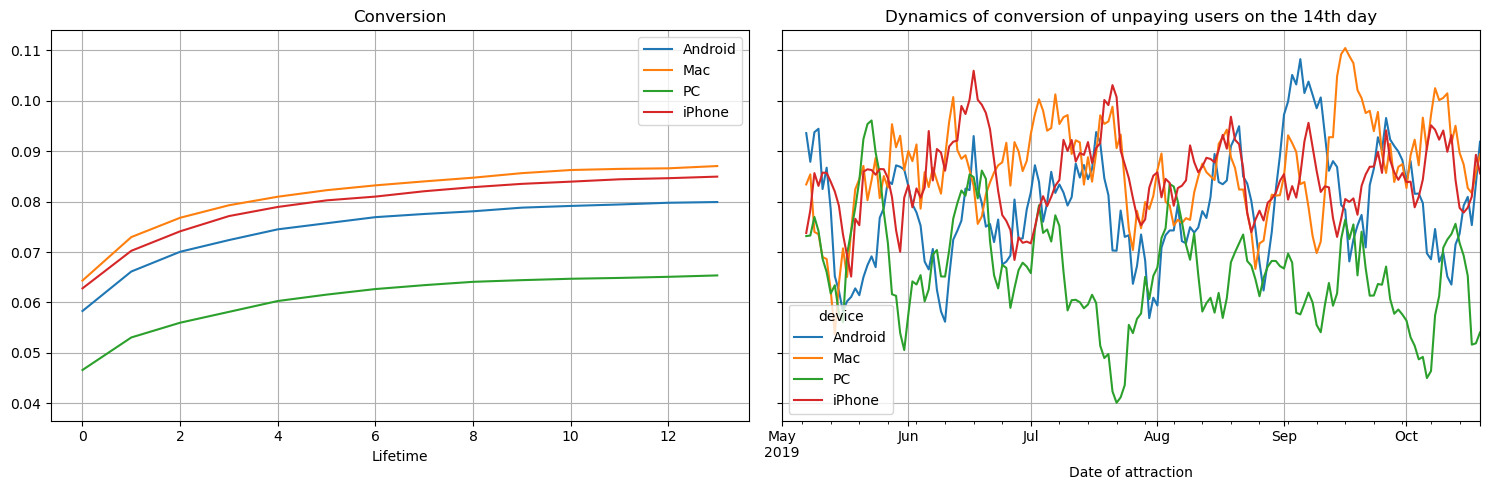

In [133]:
dimensions = ['device']
# conversion by devices

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

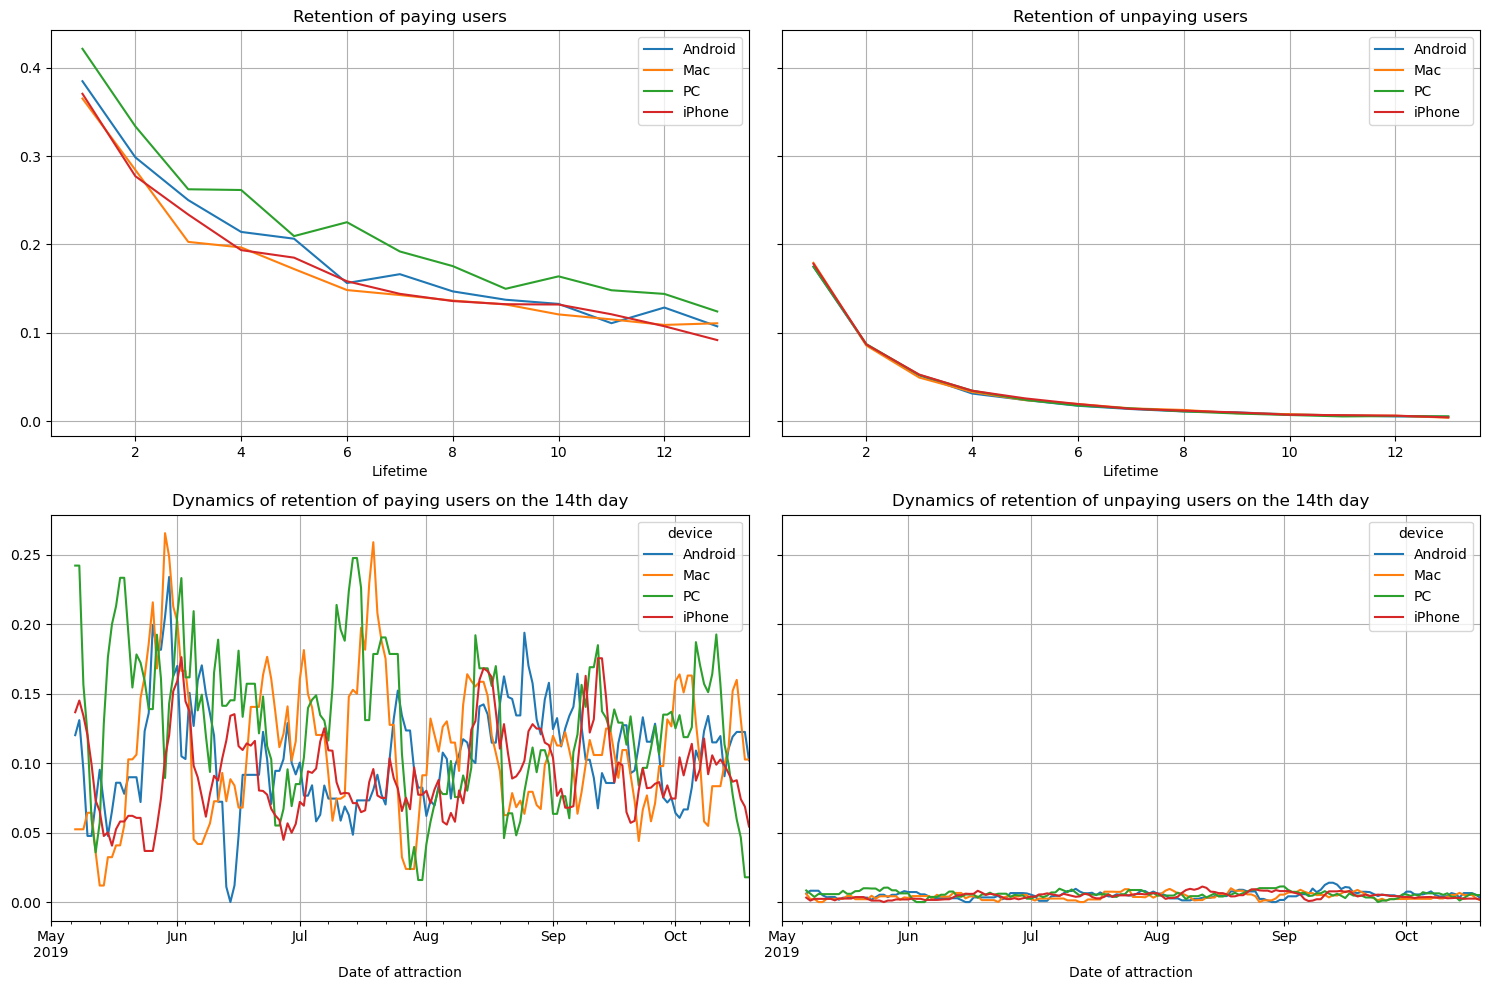

In [134]:
#retention by devices
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

The retention schedule for paying users is smooth, there are no ups.

Analyze your advertising ROI by country. Build graphs of LTV and ROI, as well as graphs of the dynamics of LTV, CAC and ROI.

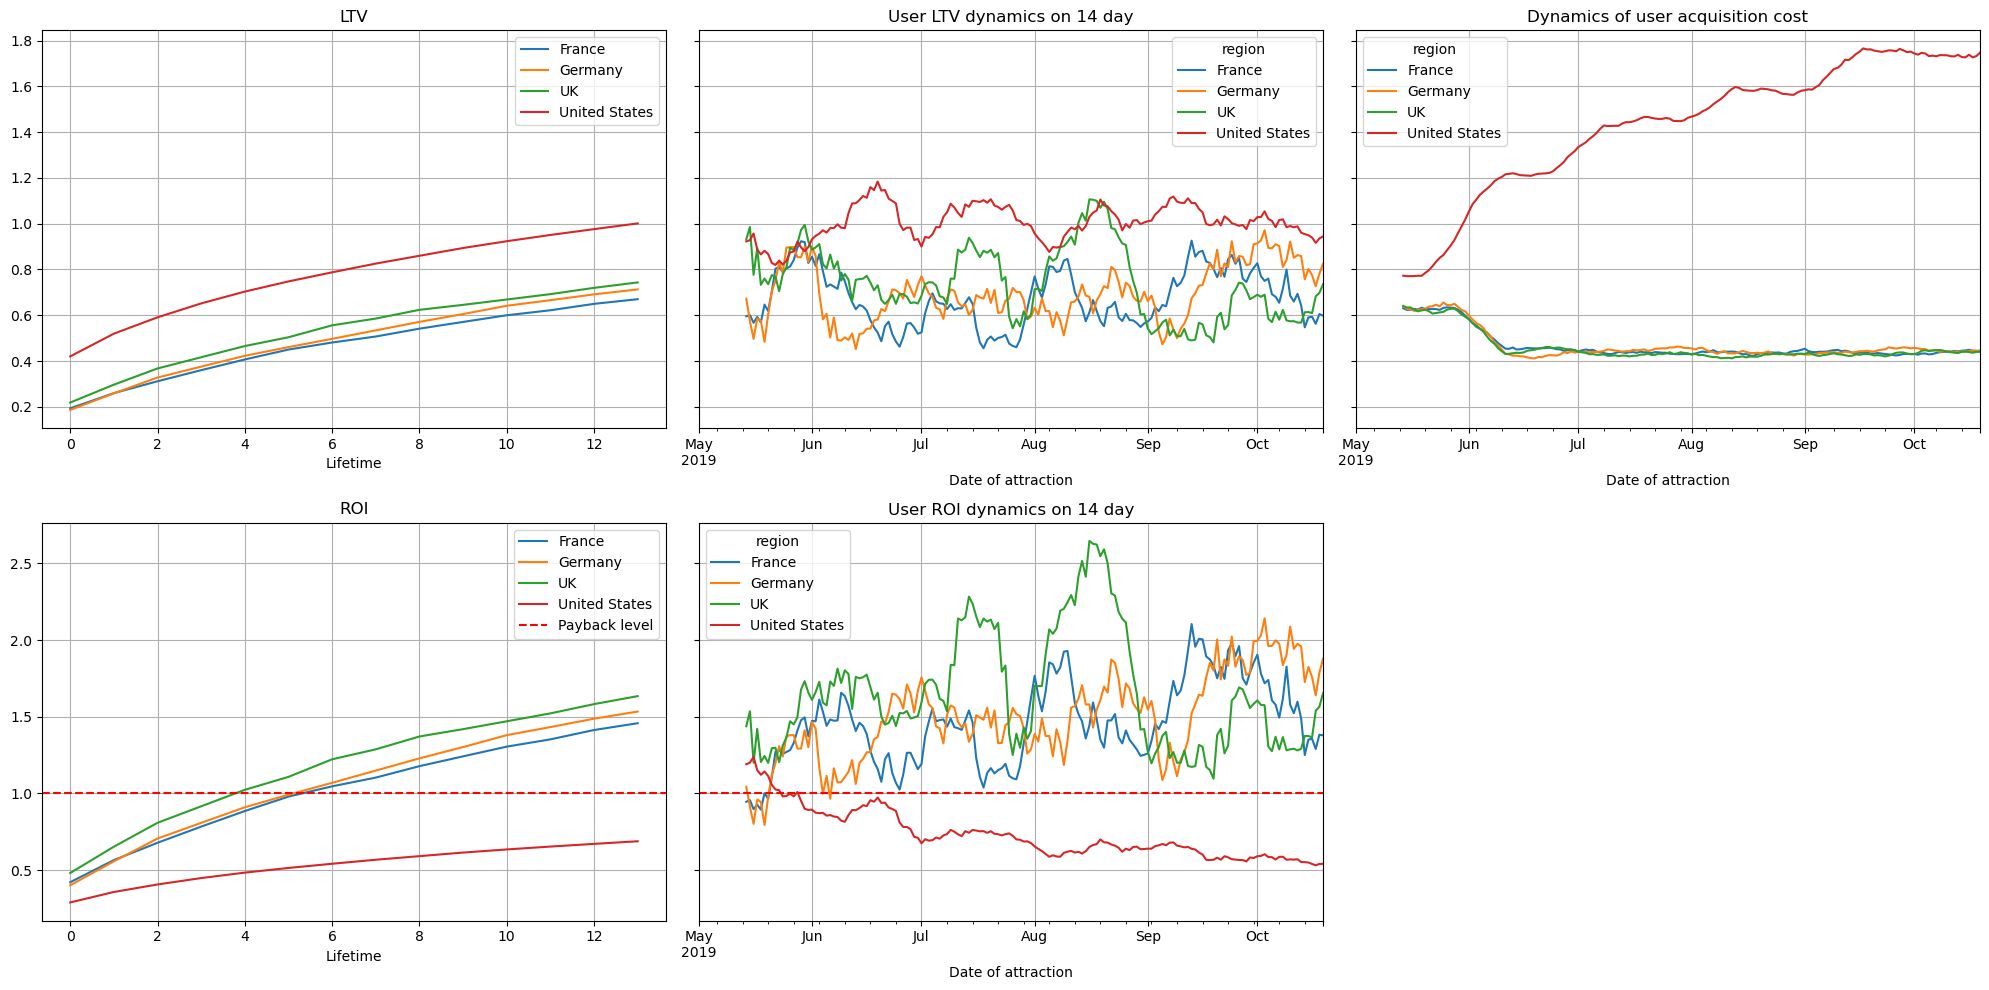

In [135]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

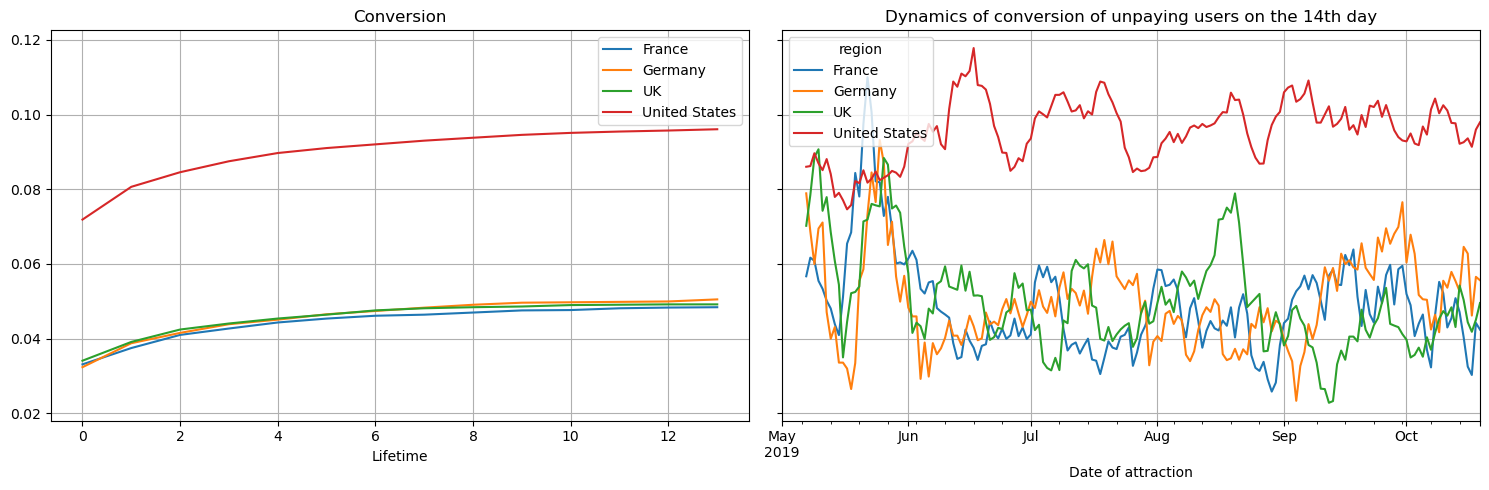

In [136]:
#conversion bycountries
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

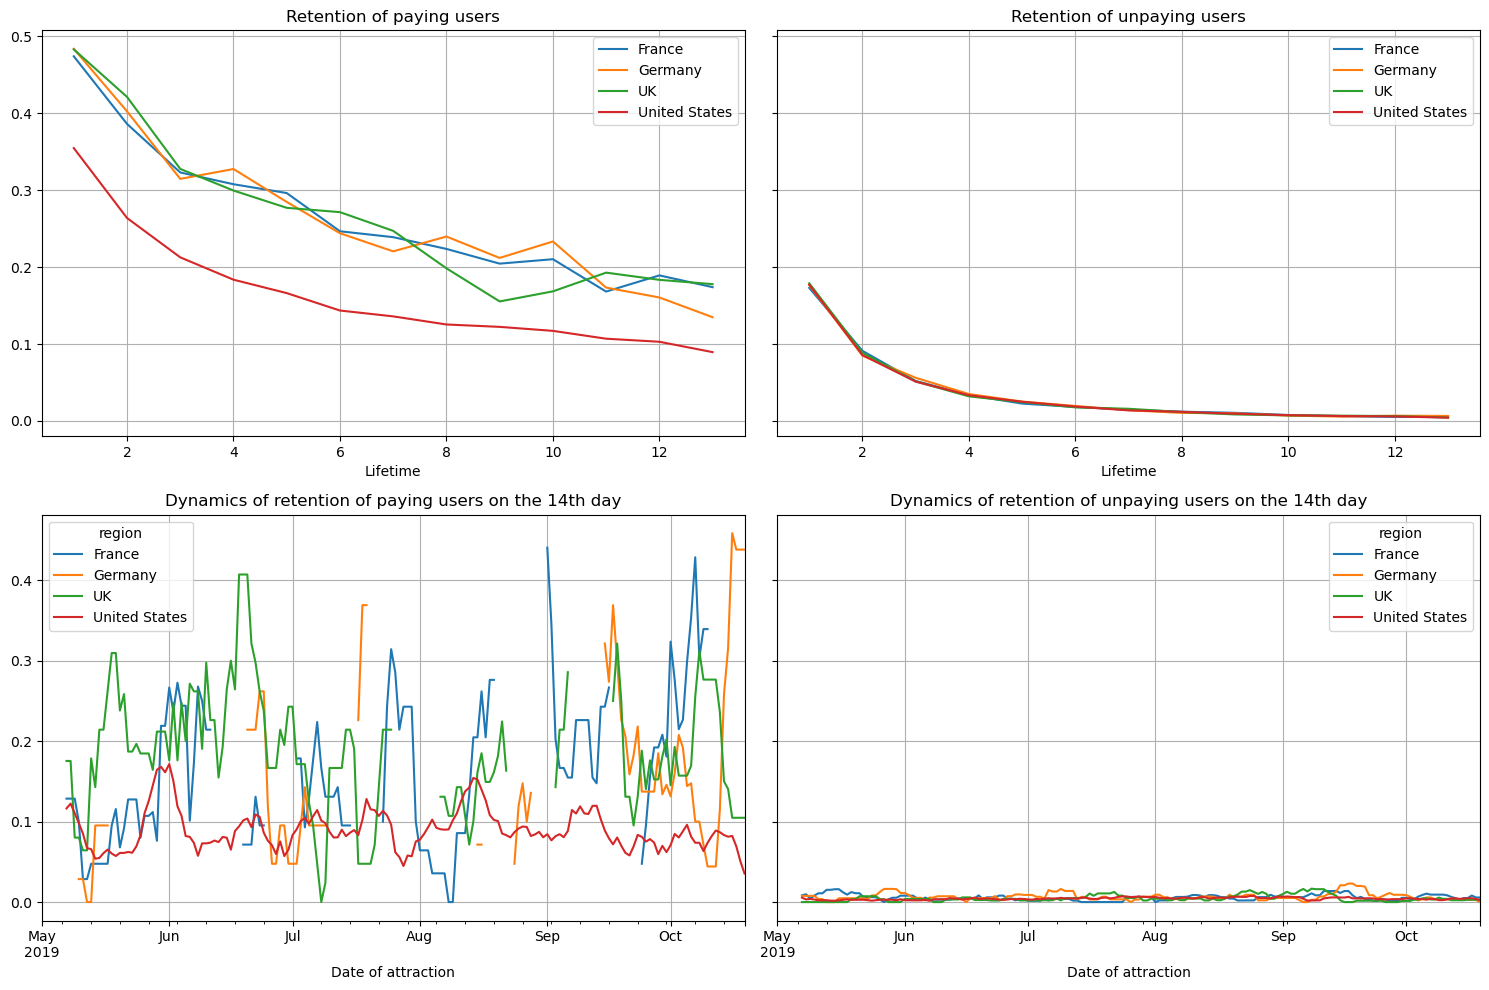

In [137]:
# retention by countries
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days) 

Users from the US make up the largest group in the dataset, they convert better than other representatives, they bring in the most money during their lifetime in the application, but the ROI for the US is the lowest and below the payback level. This is likely due to low levels of user retention from USA.

Let's analyze the payback of advertising broken down by advertising channel. Build graphs of LTV and ROI, as well as graphs of the dynamics of LTV, CAC and ROI.

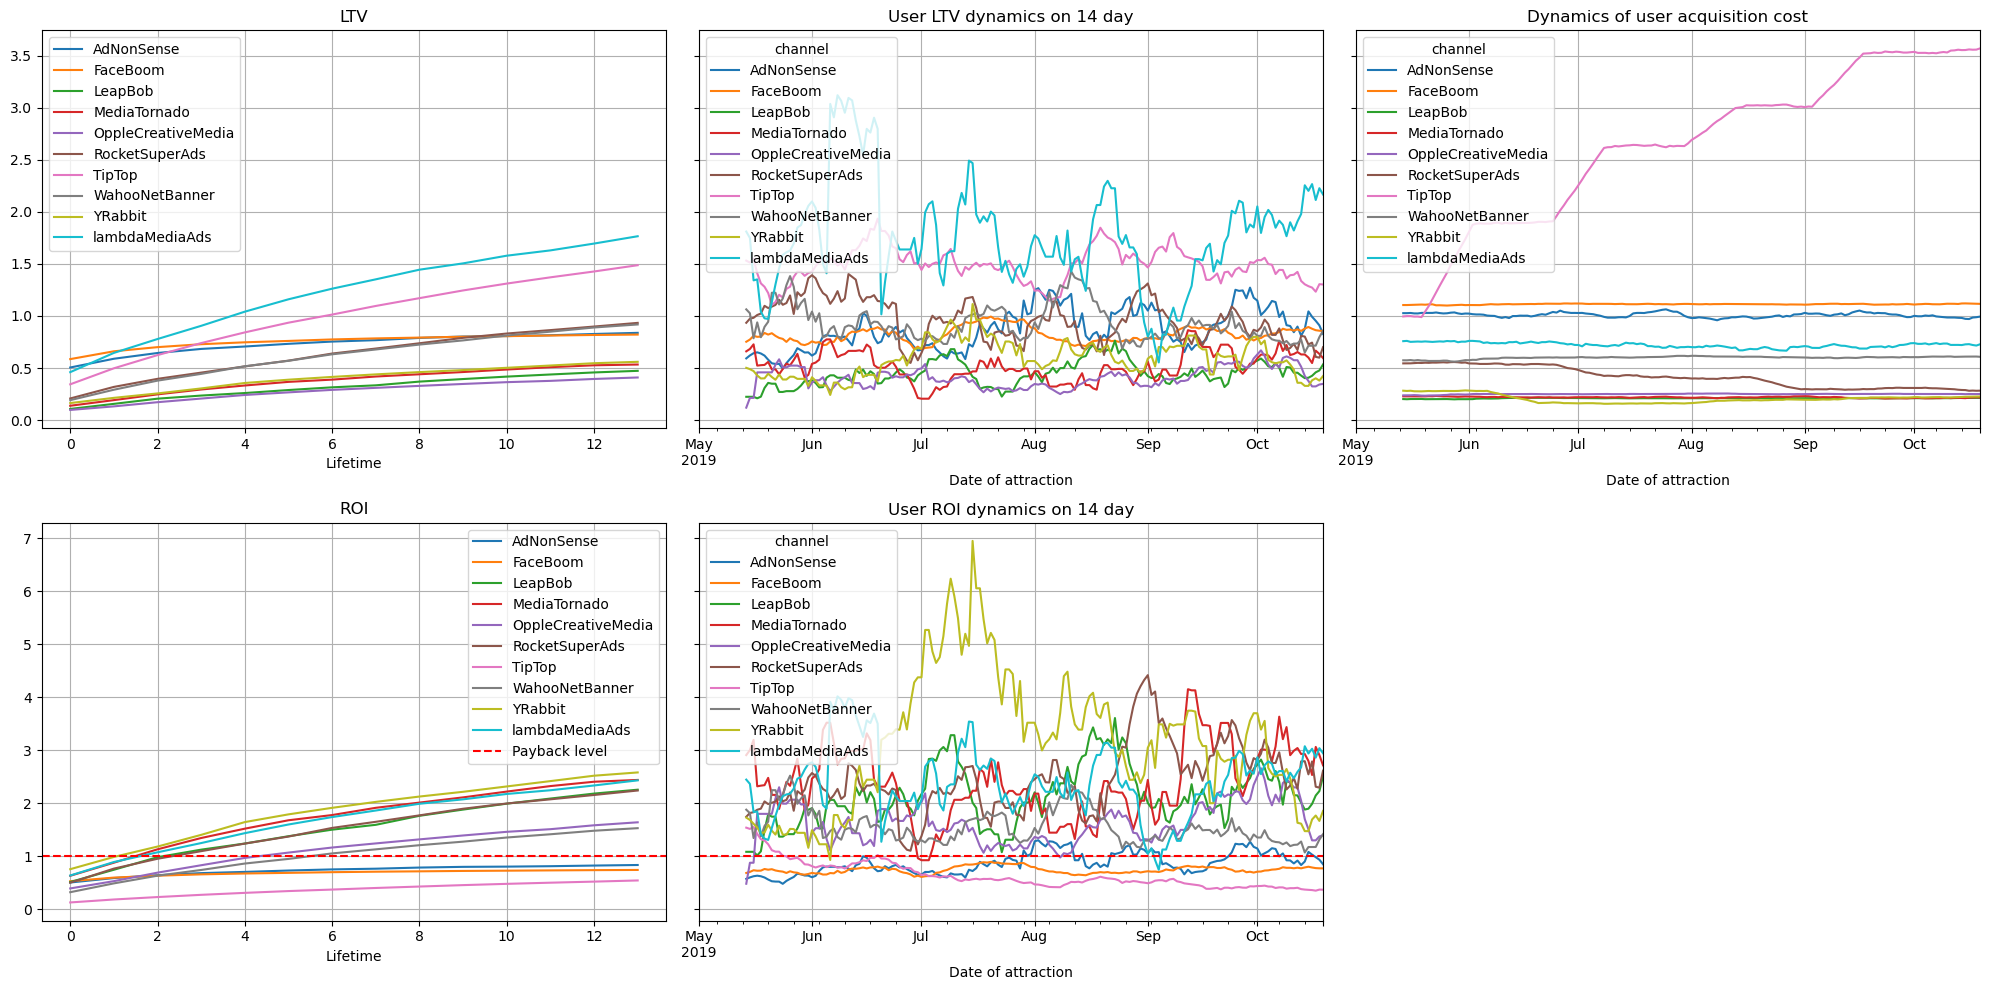

In [138]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

The LTV of users attracted through all channels has a positive trend. However, lifetime trends of users attracted through lambdaMediaAds and TipTop are noteworthy.
At the same time, CAC is much higher for users with TipTop. On the ROI chart for this channel we see minimal, close to zero, lack of payback.
The highest payback is for YRabbit, lambdaMediaAds, Mediatornado.

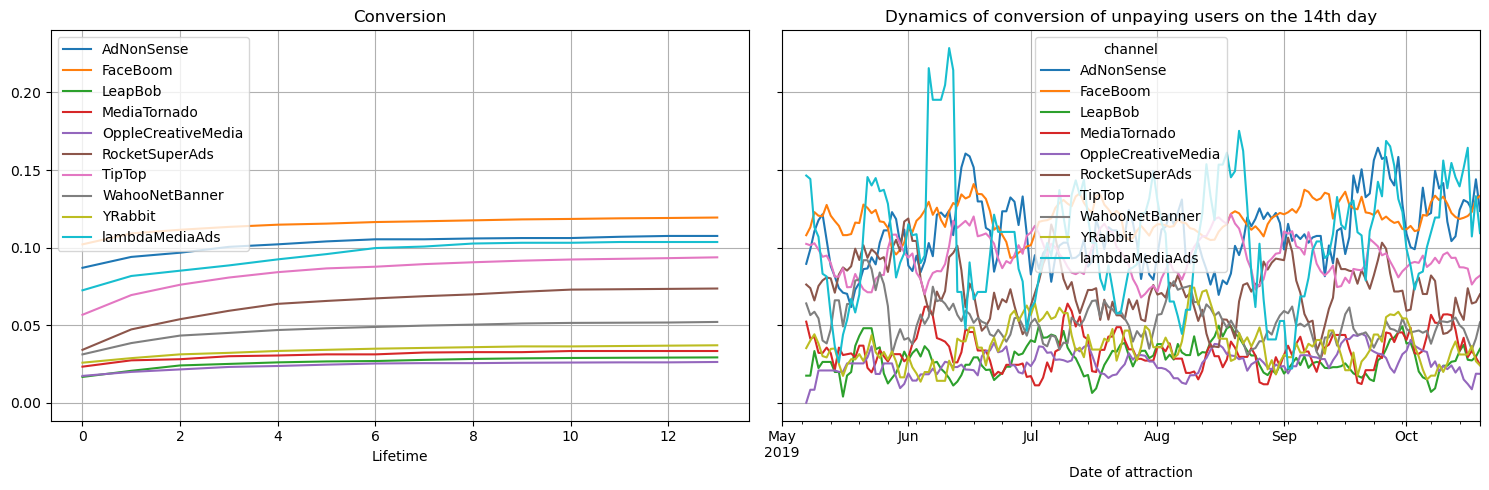

In [139]:
#conversion by acquisition channels
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Users from OppleCreativeMedia, MediaTornado, YRabbit, LeapBob channels have the lowest conversion rates. The dynamics of user conversion from lambdaMediaAds is unstable - there are sharp ups and downs over the period under review.

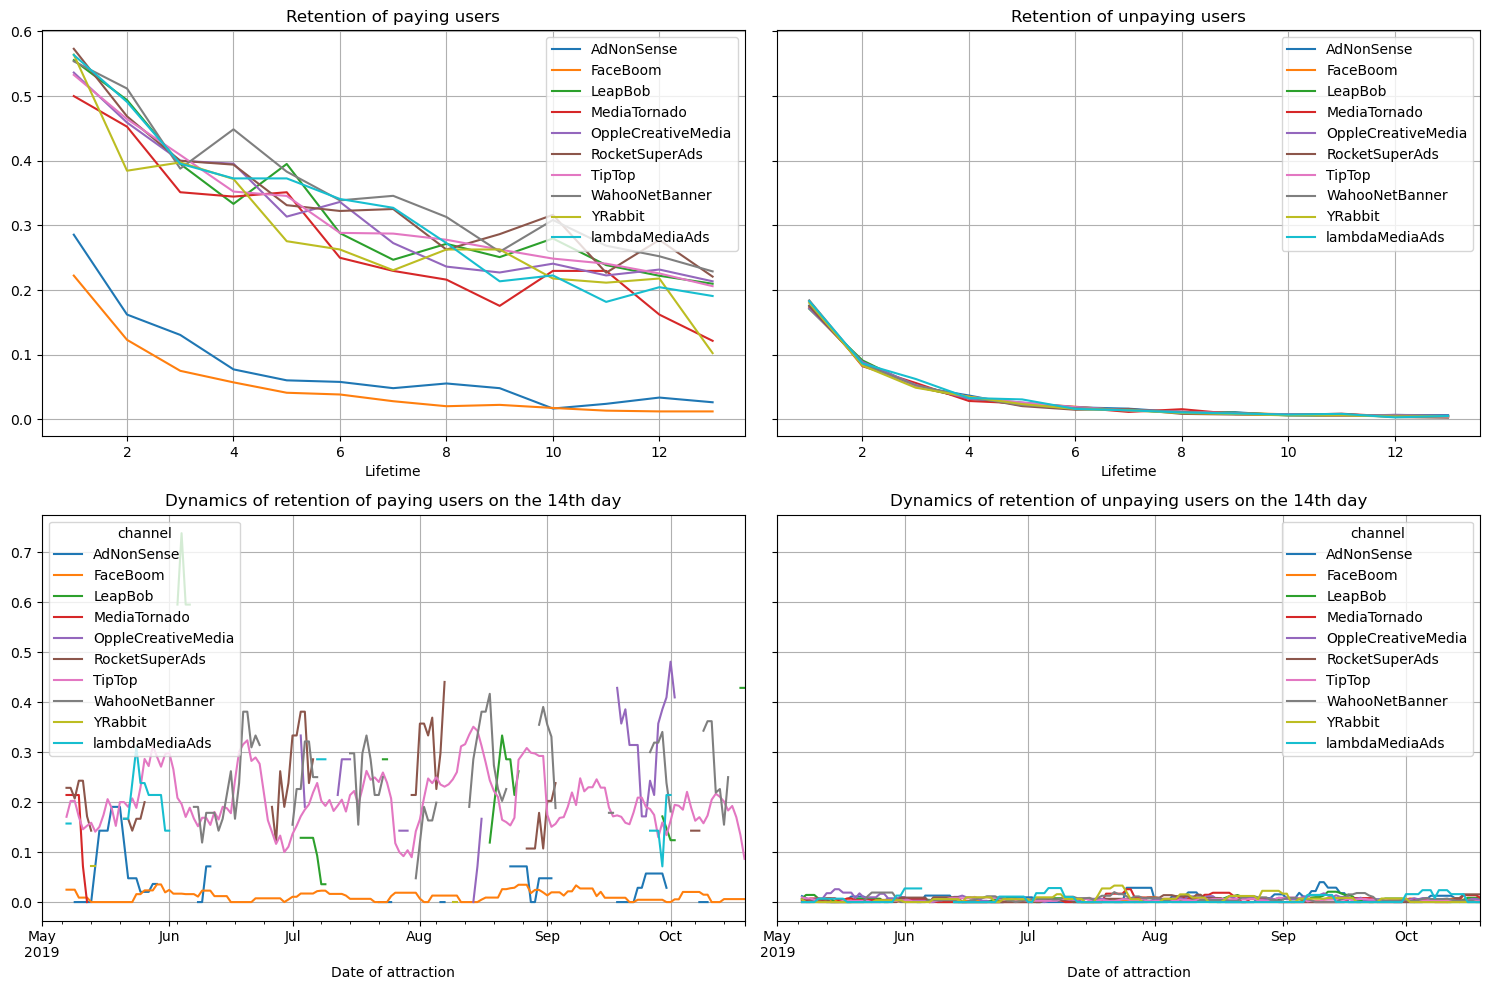

In [140]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days)

The AdNoneSense and Faceboom channels are anti-leaders in retaining paying users. The advertising budget for these channels should probably be reduced.

Of all the countries, the United States turned out to be the only one where there is a decline in ROI and with a growing cost of acquisition. However, the cost of attracting customers was not justified.

- For devices, there is a noticeable decrease in the payback dynamics by the 14th day for all, with an increase in the cost of attracting users. Mac and iPhone, as well as Android, showed results below the payback level, while they also had the highest acquisition costs.

- User retention is more stable and higher among PC users.

- Excessive spending was found on the TipTop channel, which as a result did not show positive ROI results.



### Conclusion
Having studied data on users of the Procrastinate Pro+ application from the USA, Great Britain, France and Germany, among which the USA is significantly ahead of other countries in terms of the number of users and the cost of attracting them.

However, advertising to attract users did not pay off.
The reason for the company's losses lies in high advertising costs in the United States, which does not lead to the emergence of regular customers.
The problem is that the retention of paying users from the US is low, worse than others. And it began to decline when the cost of attracting CAS jumped up sharply at the beginning of the period under review.

Users who came from the TipTop and FaceBoom channels did not pay off due to high advertising costs.

Users who came through the AdNoneSense and Faceboom channels are anti-leaders in retaining paying users. The advertising budget for these channels should probably be reduced.

Recommendations
You should redistribute costs between channels: reduce on FaceBoom and TipTop and increase on lambdaMediaAds. It also probably makes sense to shift attention from apple users to PC users, since the ROI dynamics are the most stable.
By region, I would advise you to take a closer look at Germany as the country with the smoothest and highest user retention trend
